In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, TimeDistributed
from keras.layers import LSTM

Using TensorFlow backend.


In [ ]:
# Training parameters.
batch_size = 32
num_classes = 10
epochs = 5

# Embedding dimensions.
row_hidden = 128
col_hidden = 128

# The data, shuffled and split between train and test sets.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshapes data to 4D for Hierarchical RNN.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Converts class vectors to binary class matrices.
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

row, col, pixel = x_train.shape[1:]

# 4D input.
x = Input(shape=(row, col, pixel))

# Encodes a row of pixels using TimeDistributed Wrapper.
encoded_rows = TimeDistributed(LSTM(row_hidden))(x)

# Encodes columns of encoded rows.
encoded_columns = LSTM(col_hidden)(encoded_rows)

# Final predictions and model.
prediction = Dense(num_classes, activation='softmax')(encoded_columns)
model = Model(x, prediction)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

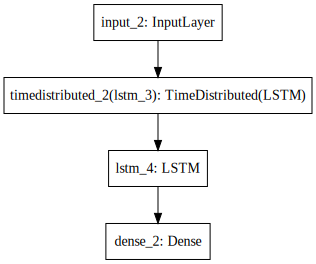

In [6]:
# Plot Nets design
#from keras.utils import plot_model
import matplotlib.pyplot as plt
from keras.utils.visualize_util import model_to_dot
from IPython.display import SVG

#plot(model, to_file='/Users/altay.amanbay/Desktop/model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
# Training.
model.fit(x_train, y_train,
          batch_size=batch_size,
          nb_epoch=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# Evaluation.
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])